# Joining Data

## 1. Join the data from Part 1 with the data from Part 2 to create a new dataframe.

*I have decided to join the data from the Yelp API only, not the Foursquare API, as the data has the most restaurants*

In [390]:
import requests
import os
import pandas as pd
from pprint import pprint
import json

# Get locations (latitude, longitude) for each station in Queretaro, Mexico.
response = requests.get("http://api.citybik.es/v2/networks/qrobici")
data = response.json()

# Create list of stations
station_data = []

for station in data['network']['stations']:
        latitude = station['latitude']
        longitude = station['longitude']
        free_bikes = station['free_bikes']
        
        station_data.append({
            'latitude': latitude,
            'longitude': longitude, 
            'bikes available': free_bikes
        })

# Create Data Frame
station_df = pd.DataFrame(station_data)
station_df

,latitude,longitude,bikes available
0,20.580650,-100.40985,12
1,20.584879,-100.40230,5
2,20.586660,-100.39620,2
3,20.589940,-100.38656,3
4,20.591220,-100.38177,5
5,20.578871,-100.40118,3
6,20.592400,-100.38900,5
7,20.582693,-100.39681,6
8,20.585168,-100.39163,4
9,20.586198,-100.38682,5


In [391]:
# Open the JSON data saved from previous jupyter file:

with open('data3.json', 'r') as f:
    saved_restaurants_list_yelp = json.loads(f.read())

# Extracting the data needed:
extracted_data_yelp = []

for entry in saved_restaurants_list_yelp:
    latitude = entry['region']['center']['latitude']
    longitude = entry['region']['center']['longitude']
    for business in entry['businesses']:
        extracted_data_yelp.append({
            'latitude': latitude,
            'longitude': longitude,
            'distance': business['distance'],
            'name': business['name'],
            'categories': business['categories'],
            'price': business['price'],
            'rating': business['rating']
            })

# Creating DataFrame:
restaurant_info_yelp_df = pd.DataFrame(extracted_data_yelp)
restaurant_info_yelp_df

,latitude,longitude,distance,name,categories,price,rating
0,20.58065,-100.40985,270.080982,Fogon do Brasil,"[{'alias': 'brazilian', 'title': 'Brazilian'}]",$$,3.0
1,20.58065,-100.40985,919.137726,Josecho,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",$$$$,5.0
2,20.58065,-100.40985,1001.499627,Karnes en Su Jugo,"[{'alias': 'comfortfood', 'title': 'Comfort Fo...",$$,4.8
3,20.58065,-100.40985,989.584691,Ichiban,"[{'alias': 'japanese', 'title': 'Japanese'}]",$$,3.8
4,20.58065,-100.40985,641.412281,Pawa,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",$$,0.0
...,...,...,...,...,...,...,...
714,20.59477,-100.37534,150.863375,Wings Army,"[{'alias': 'tradamerican', 'title': 'American'}]",$$,1.5
715,20.59477,-100.37534,1113.372263,Restaurant Bar el Palomar,"[{'alias': 'restaurants', 'title': 'Restaurant...",$,4.0
716,20.59477,-100.37534,862.625482,Juan Pestañas Mezcalería,"[{'alias': 'oaxacan', 'title': 'Oaxacan'}, {'a...",$,0.0
717,20.61194,-100.40342,493.579839,La Barbacha de los Cuatro,"[{'alias': 'bbq', 'title': 'Barbeque'}]",$,0.0


In [392]:
# Join data frames through the latitude and longitude columns
joined_df = pd.merge(station_df, restaurant_info_yelp_df, how = 'inner', on = ['latitude', 'longitude'])
joined_df

,latitude,longitude,bikes available,distance,name,categories,price,rating
0,20.58065,-100.40985,12,270.080982,Fogon do Brasil,"[{'alias': 'brazilian', 'title': 'Brazilian'}]",$$,3.0
1,20.58065,-100.40985,12,919.137726,Josecho,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",$$$$,5.0
2,20.58065,-100.40985,12,1001.499627,Karnes en Su Jugo,"[{'alias': 'comfortfood', 'title': 'Comfort Fo...",$$,4.8
3,20.58065,-100.40985,12,989.584691,Ichiban,"[{'alias': 'japanese', 'title': 'Japanese'}]",$$,3.8
4,20.58065,-100.40985,12,641.412281,Pawa,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",$$,0.0
...,...,...,...,...,...,...,...,...
714,20.59477,-100.37534,0,150.863375,Wings Army,"[{'alias': 'tradamerican', 'title': 'American'}]",$$,1.5
715,20.59477,-100.37534,0,1113.372263,Restaurant Bar el Palomar,"[{'alias': 'restaurants', 'title': 'Restaurant...",$,4.0
716,20.59477,-100.37534,0,862.625482,Juan Pestañas Mezcalería,"[{'alias': 'oaxacan', 'title': 'Oaxacan'}, {'a...",$,0.0
717,20.61194,-100.40342,11,493.579839,La Barbacha de los Cuatro,"[{'alias': 'bbq', 'title': 'Barbeque'}]",$,0.0


## 2. Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discovered.

In [393]:
# Check the structure of the dataa by accesing to the 'categories' column: 
joined_df.iat[716, 5]

[{'alias': 'oaxacan', 'title': 'Oaxacan'},
 {'alias': 'divebars', 'title': 'Dive Bars'}]

In [394]:
# Extract the 'alias' values from the 'categories' column and add them as a new column 'category'
joined_df['category'] = joined_df['categories'].apply(lambda x: ', '.join([c['alias'] for c in x]))
joined_df

,latitude,longitude,bikes available,distance,name,categories,price,rating,category
0,20.58065,-100.40985,12,270.080982,Fogon do Brasil,"[{'alias': 'brazilian', 'title': 'Brazilian'}]",$$,3.0,brazilian
1,20.58065,-100.40985,12,919.137726,Josecho,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",$$$$,5.0,"wine_bars, international"
2,20.58065,-100.40985,12,1001.499627,Karnes en Su Jugo,"[{'alias': 'comfortfood', 'title': 'Comfort Fo...",$$,4.8,comfortfood
3,20.58065,-100.40985,12,989.584691,Ichiban,"[{'alias': 'japanese', 'title': 'Japanese'}]",$$,3.8,japanese
4,20.58065,-100.40985,12,641.412281,Pawa,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",$$,0.0,"japanese, asianfusion"
...,...,...,...,...,...,...,...,...,...
714,20.59477,-100.37534,0,150.863375,Wings Army,"[{'alias': 'tradamerican', 'title': 'American'}]",$$,1.5,tradamerican
715,20.59477,-100.37534,0,1113.372263,Restaurant Bar el Palomar,"[{'alias': 'restaurants', 'title': 'Restaurant...",$,4.0,restaurants
716,20.59477,-100.37534,0,862.625482,Juan Pestañas Mezcalería,"[{'alias': 'oaxacan', 'title': 'Oaxacan'}, {'a...",$,0.0,"oaxacan, divebars"
717,20.61194,-100.40342,11,493.579839,La Barbacha de los Cuatro,"[{'alias': 'bbq', 'title': 'Barbeque'}]",$,0.0,bbq


In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
print(joined_df.info())
print(joined_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         719 non-null    float64
 1   longitude        719 non-null    float64
 2   bikes available  719 non-null    int64  
 3   distance         719 non-null    float64
 4   name             719 non-null    object 
 5   categories       719 non-null    object 
 6   price            719 non-null    object 
 7   rating           719 non-null    float64
 8   category         719 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 50.7+ KB
None
         latitude   longitude  bikes available     distance      rating
count  719.000000  719.000000       719.000000   719.000000  719.000000
mean    20.593347 -100.389987         3.211405   713.521624    3.693741
std      0.008554    0.009572         2.821986   299.154320    1.298661
min     20.578871 -100.409850     

*Some rows have more than one category, which gives an error when trying to plot it with a scatterplot. To avoid it, the categories were splitted into separate rows. Allowing each restaurant to feature more than one category, meaning that the DataFrame rows are increased.*

In [396]:
# Split the categories into separate rows
category_df = joined_df['category'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('category')

# Join the category_df with the original DataFrame
joined_df_split = joined_df.drop('category', axis=1).join(category_df)
joined_df_split.dropna(subset = ['price'], inplace = True)
joined_df_split

,latitude,longitude,bikes available,distance,name,categories,price,rating,category
0,20.58065,-100.40985,12,270.080982,Fogon do Brasil,"[{'alias': 'brazilian', 'title': 'Brazilian'}]",$$,3.0,brazilian
1,20.58065,-100.40985,12,919.137726,Josecho,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",$$$$,5.0,wine_bars
1,20.58065,-100.40985,12,919.137726,Josecho,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",$$$$,5.0,international
2,20.58065,-100.40985,12,1001.499627,Karnes en Su Jugo,"[{'alias': 'comfortfood', 'title': 'Comfort Fo...",$$,4.8,comfortfood
3,20.58065,-100.40985,12,989.584691,Ichiban,"[{'alias': 'japanese', 'title': 'Japanese'}]",$$,3.8,japanese
...,...,...,...,...,...,...,...,...,...
715,20.59477,-100.37534,0,1113.372263,Restaurant Bar el Palomar,"[{'alias': 'restaurants', 'title': 'Restaurant...",$,4.0,restaurants
716,20.59477,-100.37534,0,862.625482,Juan Pestañas Mezcalería,"[{'alias': 'oaxacan', 'title': 'Oaxacan'}, {'a...",$,0.0,oaxacan
716,20.59477,-100.37534,0,862.625482,Juan Pestañas Mezcalería,"[{'alias': 'oaxacan', 'title': 'Oaxacan'}, {'a...",$,0.0,divebars
717,20.61194,-100.40342,11,493.579839,La Barbacha de los Cuatro,"[{'alias': 'bbq', 'title': 'Barbeque'}]",$,0.0,bbq


In [397]:
# Check the what type of values are in the column 'price'. 
print(f"Count of unique values in the Price Column: \n{joined_df_split['price'].value_counts()}")

print('')
      
print(f'Unique values in the Price Column: {joined_df_split["price"].nunique()}')

Count of unique values in the Price Column: 
price
$$      582
$$$     282
$       262
$$$$      4
Name: count, dtype: int64

Unique values in the Price Column: 4


*With the data frame splitted, the information and description of the table was printed again to see how the data frame changed:*

In [398]:
# Information about the data frame splitted 
print(joined_df_split.info(),'\n')
print(joined_df_split.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1130 entries, 0 to 718
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         1130 non-null   float64
 1   longitude        1130 non-null   float64
 2   bikes available  1130 non-null   int64  
 3   distance         1130 non-null   float64
 4   name             1130 non-null   object 
 5   categories       1130 non-null   object 
 6   price            1130 non-null   object 
 7   rating           1130 non-null   float64
 8   category         1130 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 88.3+ KB
None 

          latitude    longitude  bikes available     distance       rating
count  1130.000000  1130.000000      1130.000000  1130.000000  1130.000000
mean     20.593158  -100.389882         3.212389   705.987903     3.627788
std       0.008515     0.009409         2.775482   298.512442     1.314068
min      20.578871  -100

*From the description of the dataframe `joined_df_split`, we can see that there is likely not outliers in the data, as the mean and the 50% quartile are very similar. It also shows that there are not nulls in the data, as the total number of entries is 1130, and all the non-null counts are also 1130 for all columns.*

*To double check if there is any outliers, the following Box Plots were created:* 

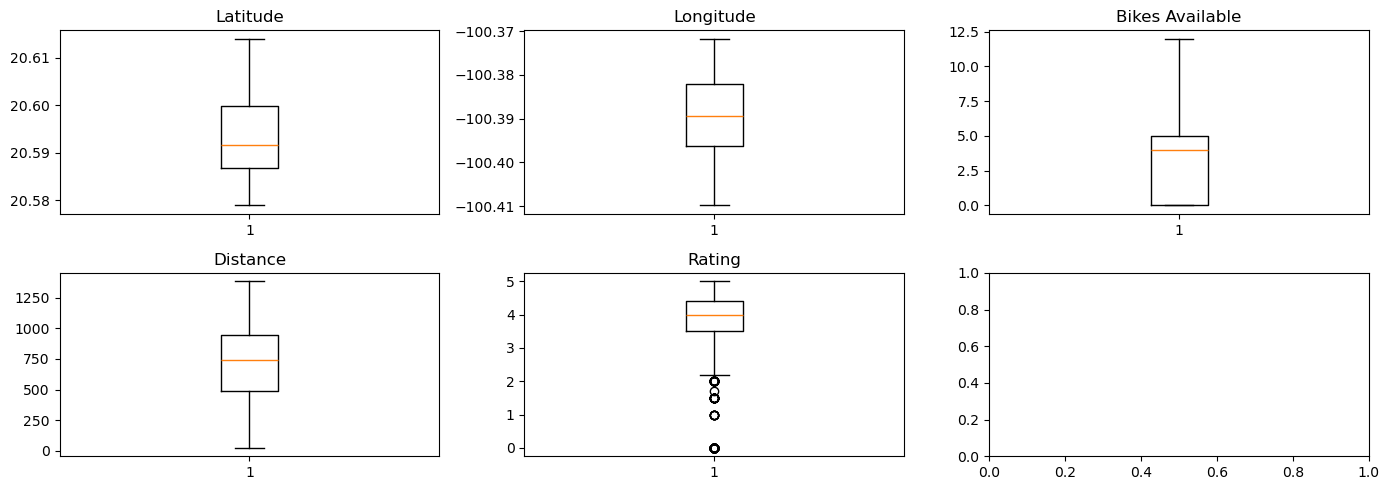

In [401]:
# Check for outliers with Box Plots:

fig, axes = plt.subplots(2, 3, figsize=(14, 5))

axes[0, 0].boxplot(joined_df_split['latitude'])
axes[0, 0].set_title('Latitude')
axes[0, 1].boxplot(joined_df_split['longitude'])
axes[0, 1].set_title('Longitude')
axes[0, 2].boxplot(joined_df_split['bikes available'])
axes[0, 2].set_title('Bikes Available')
axes[1, 0].boxplot(joined_df_split['distance'])
axes[1, 0].set_title('Distance')
axes[1, 1].boxplot(joined_df_split['rating'])
axes[1, 1].set_title('Rating')

plt.tight_layout()
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Box Plot Outliers.png')
plt.show()

*It seems like the 'Rating' columns contains some outliers, however, because this is the rating, it could be that some restaurants are rated really low by some customers compared to most of the restaurants ratings. Due to this being a very subjective column, meaning that we cannot say for sure that those ratings are outliers, because customers might have actually rated them that way, they won't be removed from the data set.* 

*In the following histogram, the distribution of the ratings will be presented:*

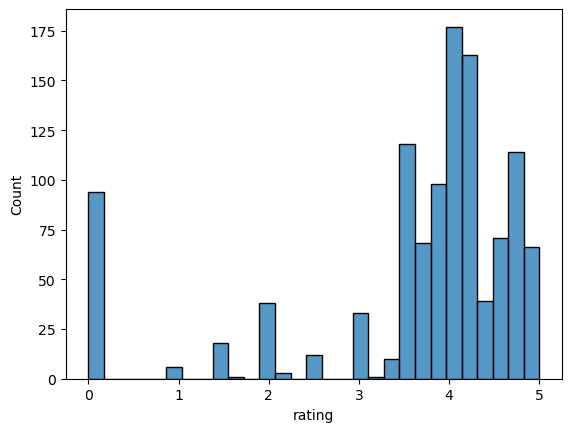

In [402]:
# Distribution of 'Rating' column:
sns.histplot(joined_df_split['rating'])
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Rating Distribution.png')
plt.show()

*As mentioned before, it seems like the ratings are usually among 3.5 and 5, however, it is possible that some restaurants are being rated below that, or even 0. We will see if there is any relationship between the price, the rating, the categories and the number of bikes around the area.*

In [ ]:
# Scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=joined_df_split, x='rating', y='price')
plt.title('Restaurant Locations')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.legend(title='Rating vs Price', bbox_to_anchor=(1, 1))
plt.show()

#OUTPUT:
# ValueError: 
# $$
# ^
# ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

*The error above shows several times for different types of graphs because of the column 'price' having \$ signs as values, in order to avoid this error the values of that columns will be mapped to numbers to represent how expensive a particular restaurant is: 1-4, 1 being the cheapest and 4 the most expesive one.*


In [404]:
# Mapping the values of the 'price' column in the data frame joined_df_split

price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
joined_df_split['price'] = joined_df_split['price'].map(price_mapping)
joined_df_split.head()

,latitude,longitude,bikes available,distance,name,categories,price,rating,category
0,20.58065,-100.40985,12,270.080982,Fogon do Brasil,"[{'alias': 'brazilian', 'title': 'Brazilian'}]",2,3.0,brazilian
1,20.58065,-100.40985,12,919.137726,Josecho,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",4,5.0,wine_bars
1,20.58065,-100.40985,12,919.137726,Josecho,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",4,5.0,international
2,20.58065,-100.40985,12,1001.499627,Karnes en Su Jugo,"[{'alias': 'comfortfood', 'title': 'Comfort Fo...",2,4.8,comfortfood
3,20.58065,-100.40985,12,989.584691,Ichiban,"[{'alias': 'japanese', 'title': 'Japanese'}]",2,3.8,japanese


In [405]:
# Information about the data frame once the values in the 'price' column have been mapped to numerical values: 
print(joined_df_split.info(),'\n')
print(joined_df_split.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1130 entries, 0 to 718
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         1130 non-null   float64
 1   longitude        1130 non-null   float64
 2   bikes available  1130 non-null   int64  
 3   distance         1130 non-null   float64
 4   name             1130 non-null   object 
 5   categories       1130 non-null   object 
 6   price            1130 non-null   int64  
 7   rating           1130 non-null   float64
 8   category         1130 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 88.3+ KB
None 

          latitude    longitude  bikes available     distance        price  \
count  1130.000000  1130.000000      1130.000000  1130.000000  1130.000000   
mean     20.593158  -100.389882         3.212389   705.987903     2.024779   
std       0.008515     0.009409         2.775482   298.512442     0.703846   
min      20.

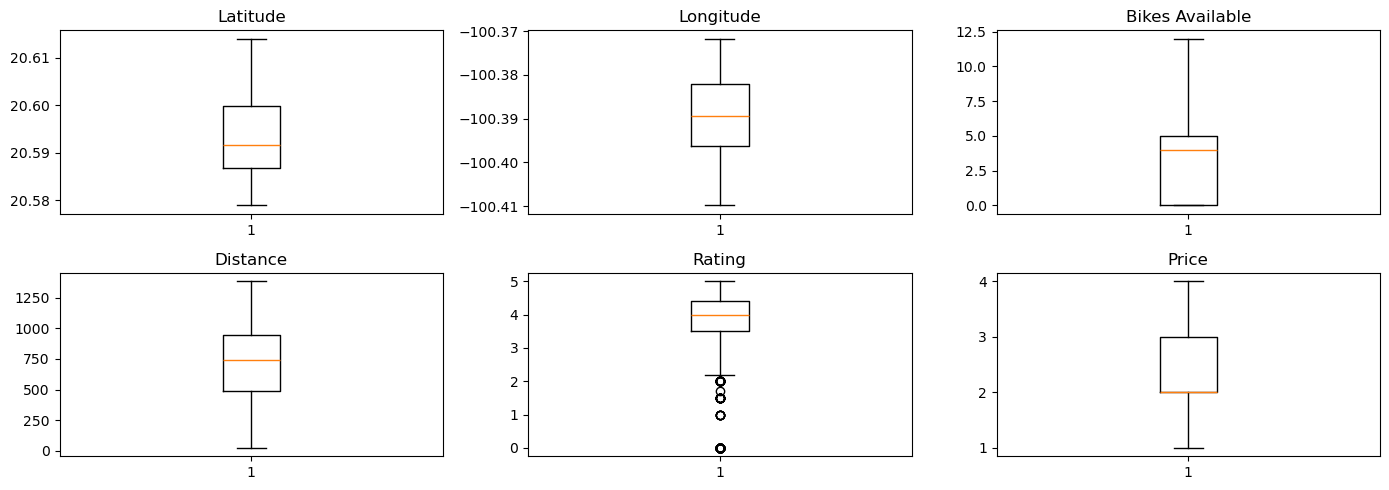

In [406]:
# Checking for outliers including the 'price' column, which was not taken into account in the previous figure:

# Check for outliers with Box Plots:

fig, axes = plt.subplots(2, 3, figsize=(14, 5))

axes[0, 0].boxplot(joined_df_split['latitude'])
axes[0, 0].set_title('Latitude')
axes[0, 1].boxplot(joined_df_split['longitude'])
axes[0, 1].set_title('Longitude')
axes[0, 2].boxplot(joined_df_split['bikes available'])
axes[0, 2].set_title('Bikes Available')
axes[1, 0].boxplot(joined_df_split['distance'])
axes[1, 0].set_title('Distance')
axes[1, 1].boxplot(joined_df_split['rating'])
axes[1, 1].set_title('Rating')
axes[1, 2].boxplot(joined_df_split['price'])
axes[1, 2].set_title('Price')

plt.tight_layout()
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Box Plots Outliers After Mapping Price Category.png')
plt.show()

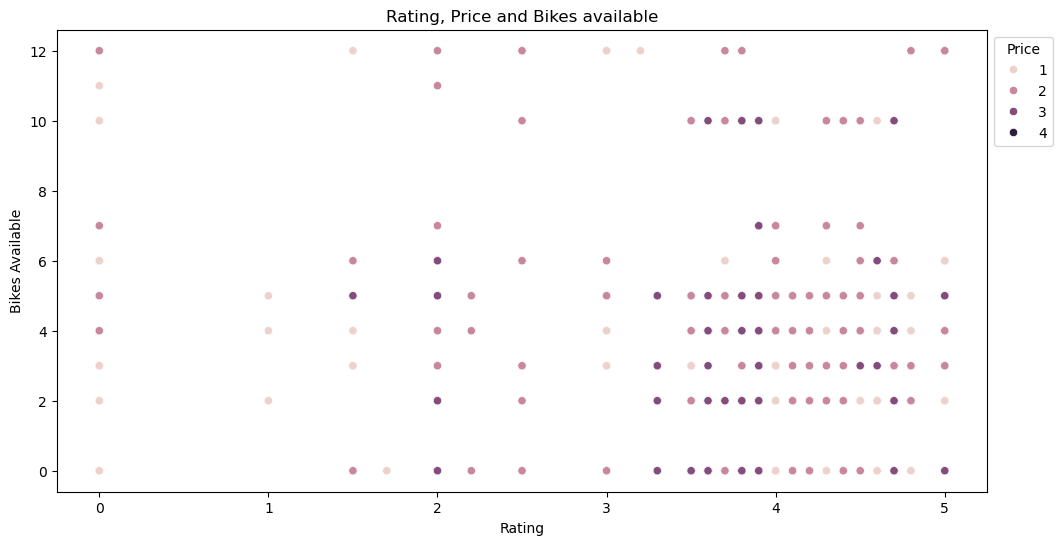

In [407]:
# Scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=joined_df_split, x='rating', y='bikes available', hue = 'price')
plt.title('Rating, Price and Bikes available')
plt.xlabel('Rating')
plt.ylabel('Bikes Available')
plt.legend(title='Price', bbox_to_anchor=(1, 1))
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Scatterplot.png')
plt.show()

*The scatterplot is checking if there is any correlation between the variables Bikes Available, Rating and Price. Is it however really difficul to see if there is any correlation between them with this plot. However, we can see a slight accumulation of Bikes Available in whenever the Rating is hight (between 4-5), which could mean that people could potentially be more interested in commuting to the restaurants with higher ratings. Another interesting thing to see, is that the prices also change and are usually higher priced restaurants around ratings between 3-5, being the cheaper restaurants the ones with ratings of 0.* 

*In the following kernel density plots we will check if there is any behaviour worth exploring:*

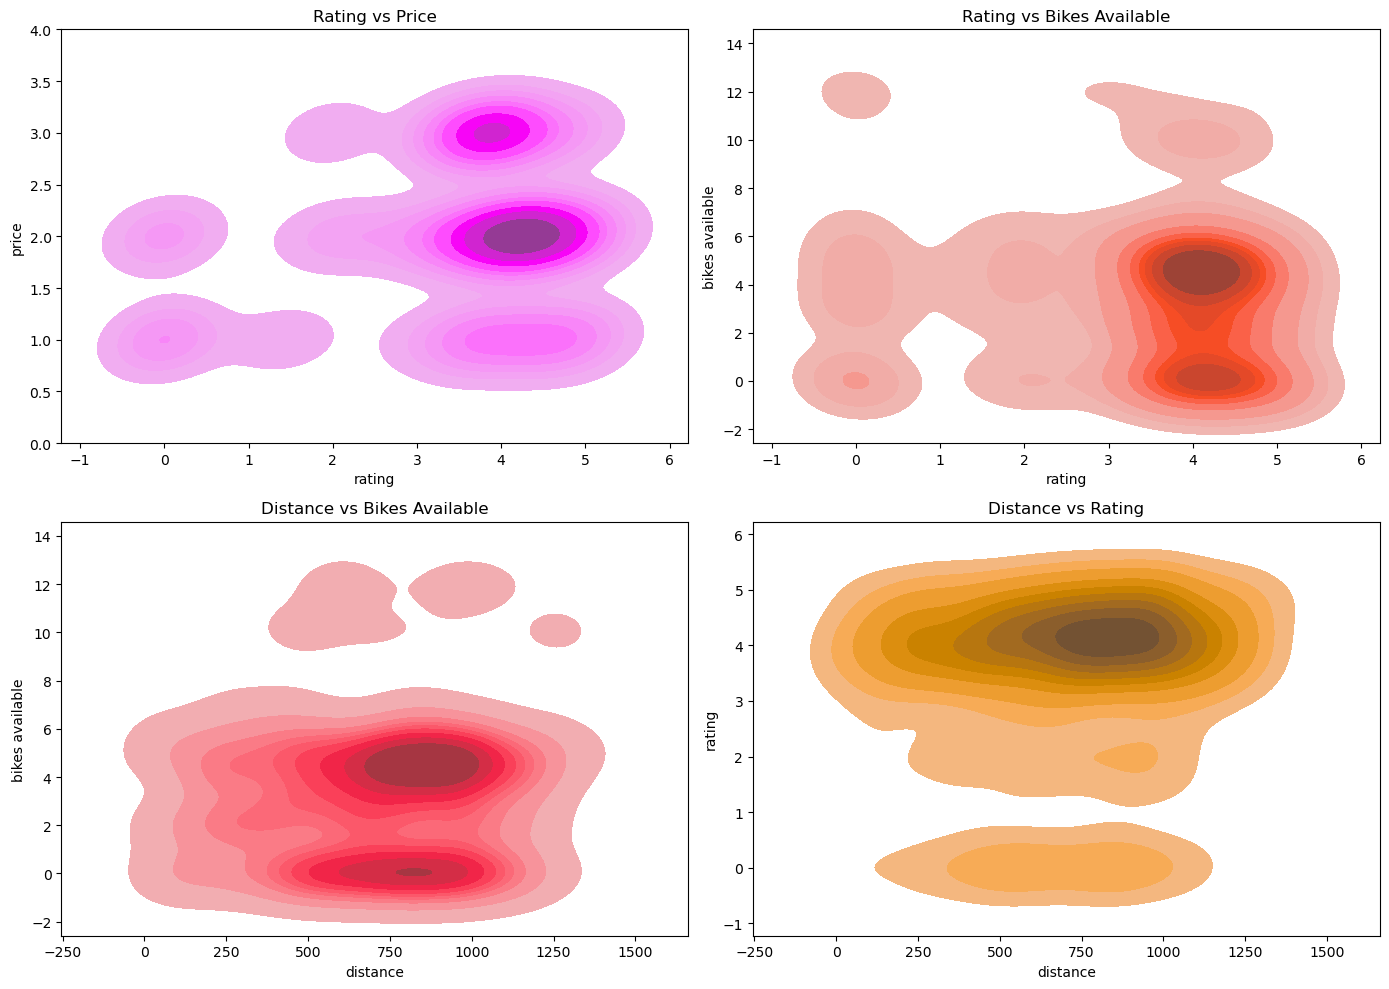

In [408]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.kdeplot(data=joined_df_split, x='rating', y='price', fill=True, color='purple', ax=axes[0, 0])
axes[0, 0].set_title('Rating vs Price')
axes[0, 0].set_ylim(0, 4)

sns.kdeplot(data=joined_df_split, x='rating', y='bikes available', fill=True, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Rating vs Bikes Available')

sns.kdeplot(data=joined_df_split, x='distance', y='bikes available', fill=True, color='crimson', ax=axes[1, 0])
axes[1, 0].set_title('Distance vs Bikes Available')

sns.kdeplot(data=joined_df_split, x='distance', y='rating', fill=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Distance vs Rating')

plt.tight_layout()
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Kernel Density Plots.png')
plt.show()

*As shown in the plot 'Rating vs Price' above, we can see one main cluter, where must restaurants have a rating of 3-5 and prices are ranging from Cheap (1) to Moderate-High(3-3.5). More especifically, restaurants with ratings of 4-5 are not considered to be too expensive, moderately expensive restaurants also have ratings around 4. There are also another two clusters in that plot that encapsulate restaurants which ratings are really low (0-1) and prices are also considered cheap (1-2).*

*For the 'Rating vs Bikes Available' plot, we can see two major clusters, where the majority of restaurants are concentrated around ratings between 4 and 5 and availability of bikes around 0 or around 5, being 10 the maximum amount of bikes available. This could imply that there is a higher demand for bikes around the restaurants that have the highest ratings, due to more people visiting these places and potentially needing to comute after. The same can be implied by the fact that there are several bikes available around restaurants with higher ratings, which could mean more people commuting there and leaving the bikes in the stations closer to these restaurants.*  

*For the 'Distance vs Bikes Available' and the 'Distance vs Rating' plots, we can see that most restaurants would be at least 750mts away from the bike stations, and we can observe that the majority of restaurants around that area are rated very highly. Meaning that a lot of the bike stations available will be around restaurants with higer ratings to potentially increase the amount of people using their bikes. We can see that around the same distance the bikes available are either around 0 or around 5, which could mean that there are several bikes being used around that area as well as several bikes being dropped off around the same area, which could be due to the popularity of the restaurants due to their high ratings.*


*For the following histogram, all categories have been included and stacked, as well as grouped by their rating distribution. There are several categories and it is hard to see what categories have the highest counts of high ratings. But it helps to visualize all the different type of catergories present in the data.* 

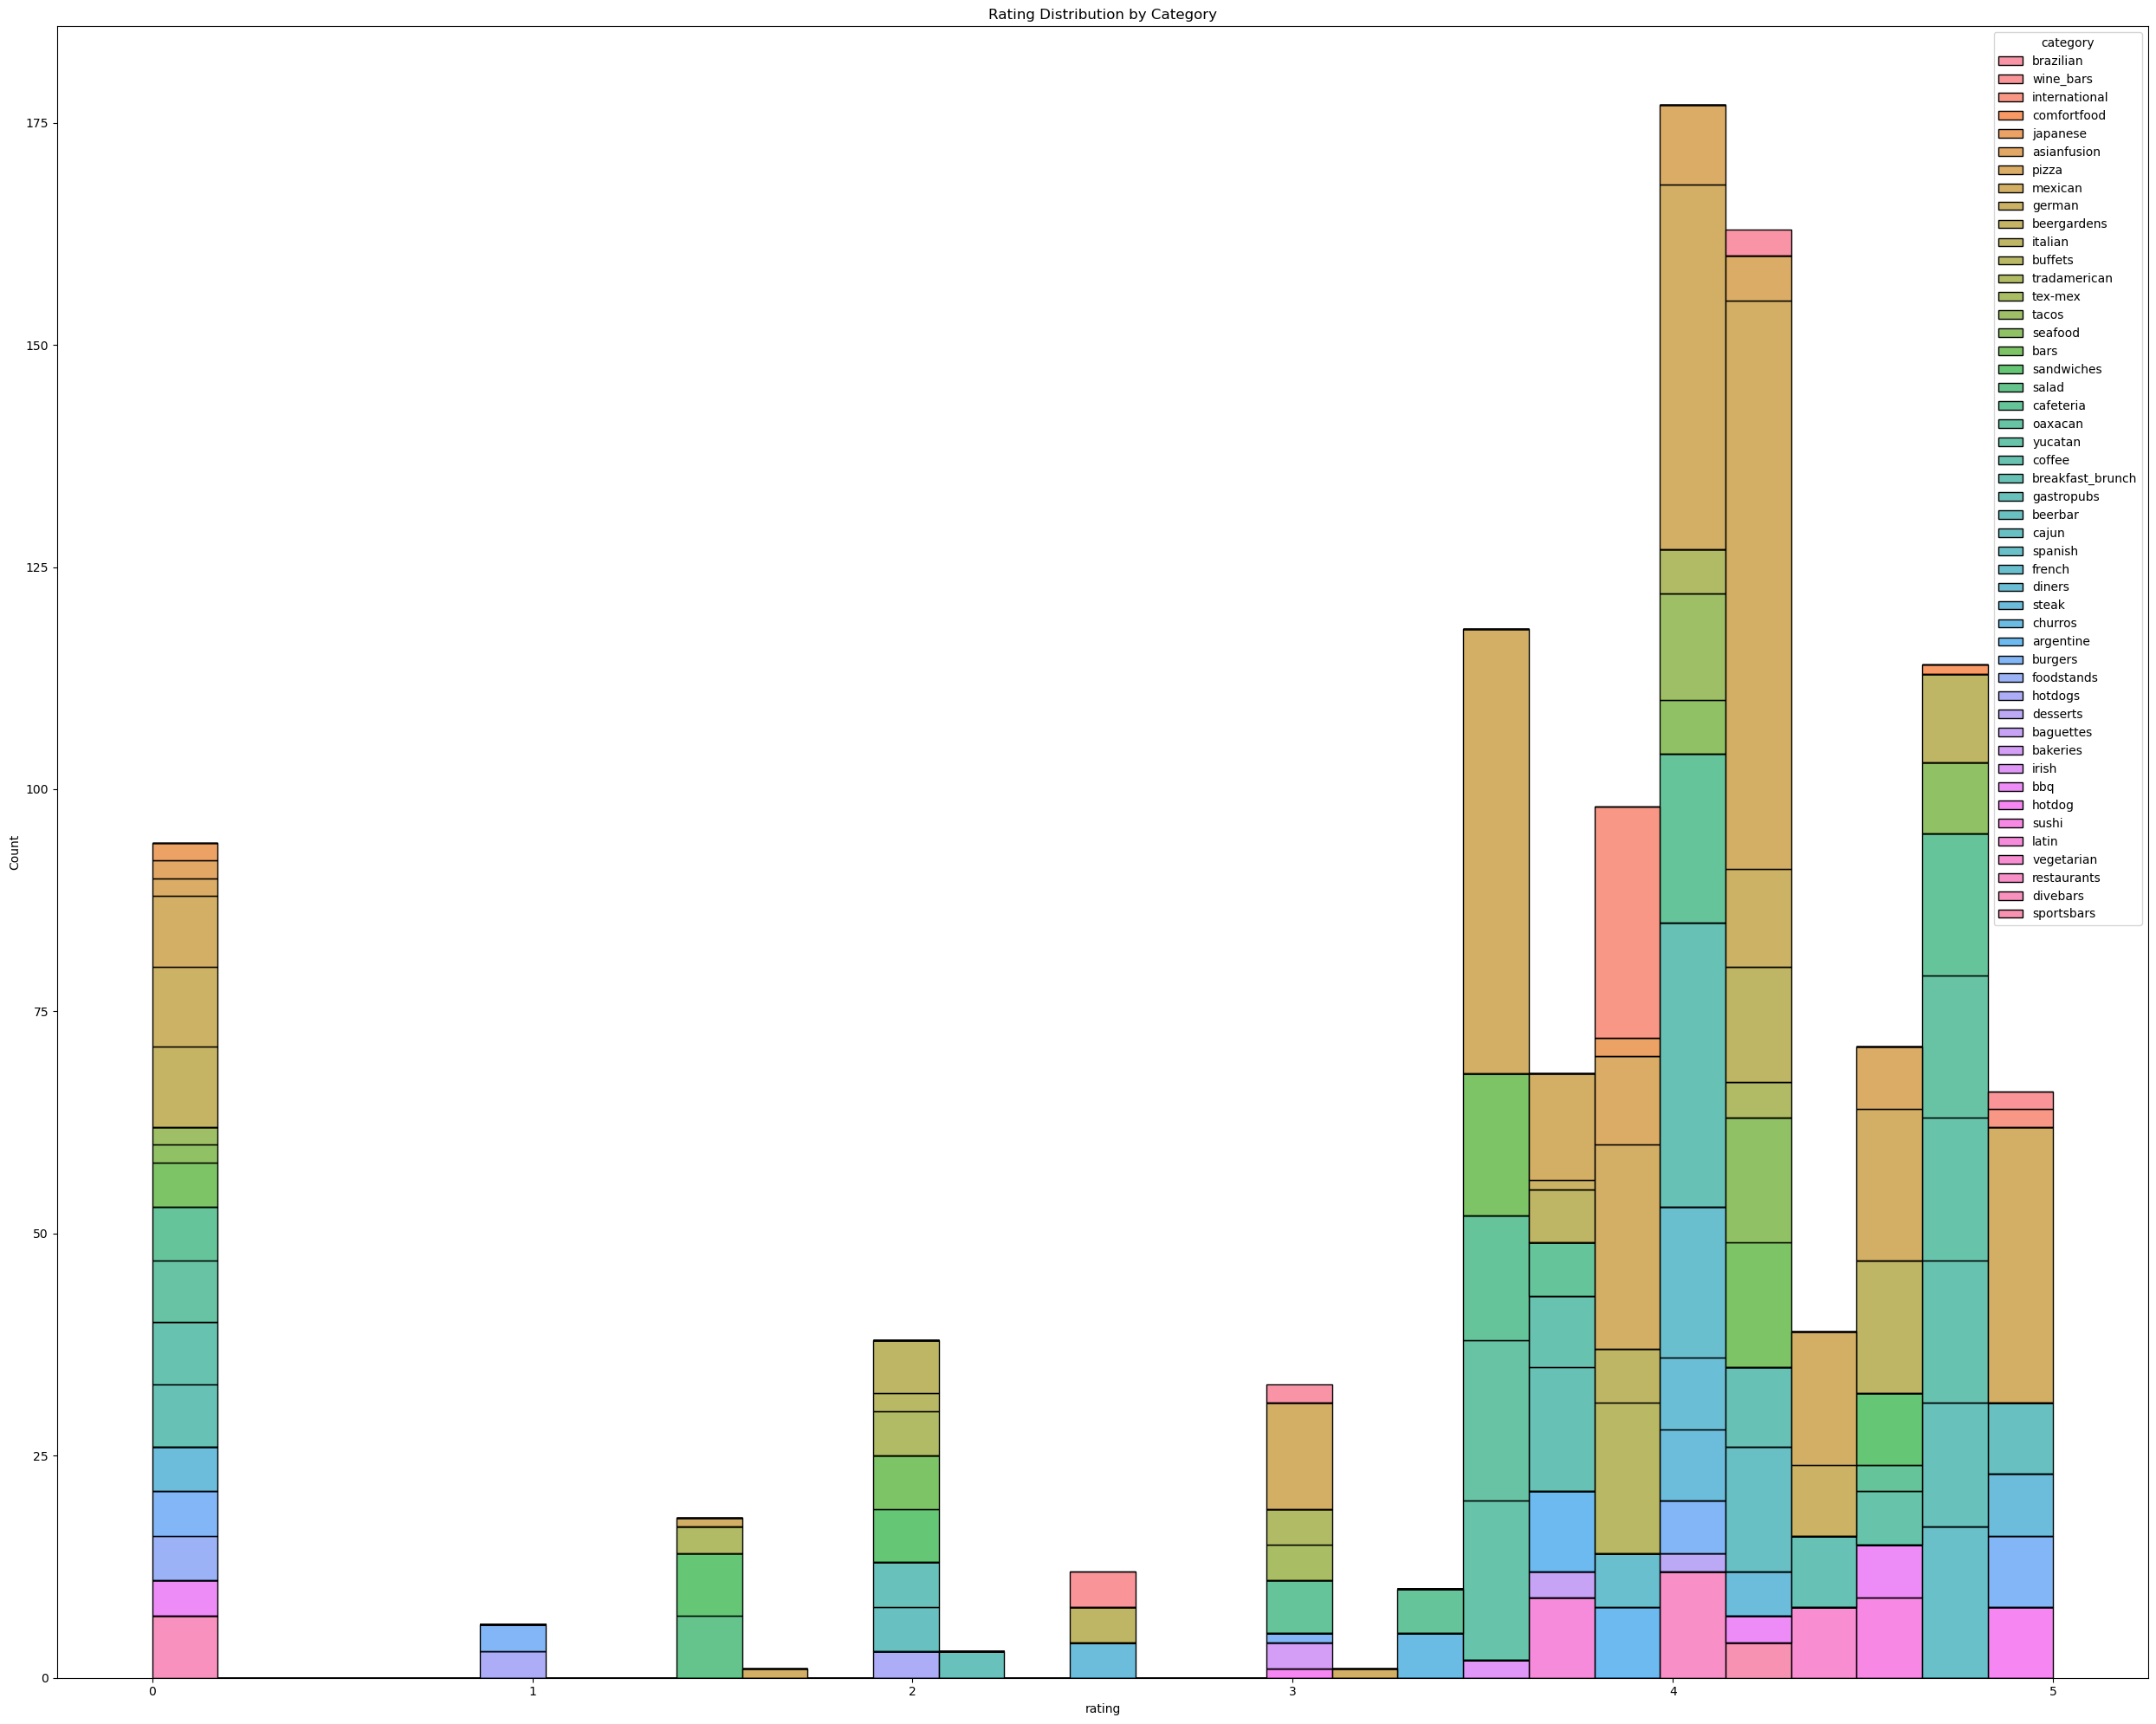

In [409]:
# Rating Distribution by Category
fig, axes = plt.subplots(figsize=(25, 20))

sns.histplot(data=joined_df_split, x='rating', hue='category', multiple='stack', ax=axes)
axes.set_title('Rating Distribution by Category')

plt.tight_layout()
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Rating Distributon by Category.png')
plt.show()

*In the following histograms, we can also observe the Category Distribution by Rating and Price (two separate plots).*

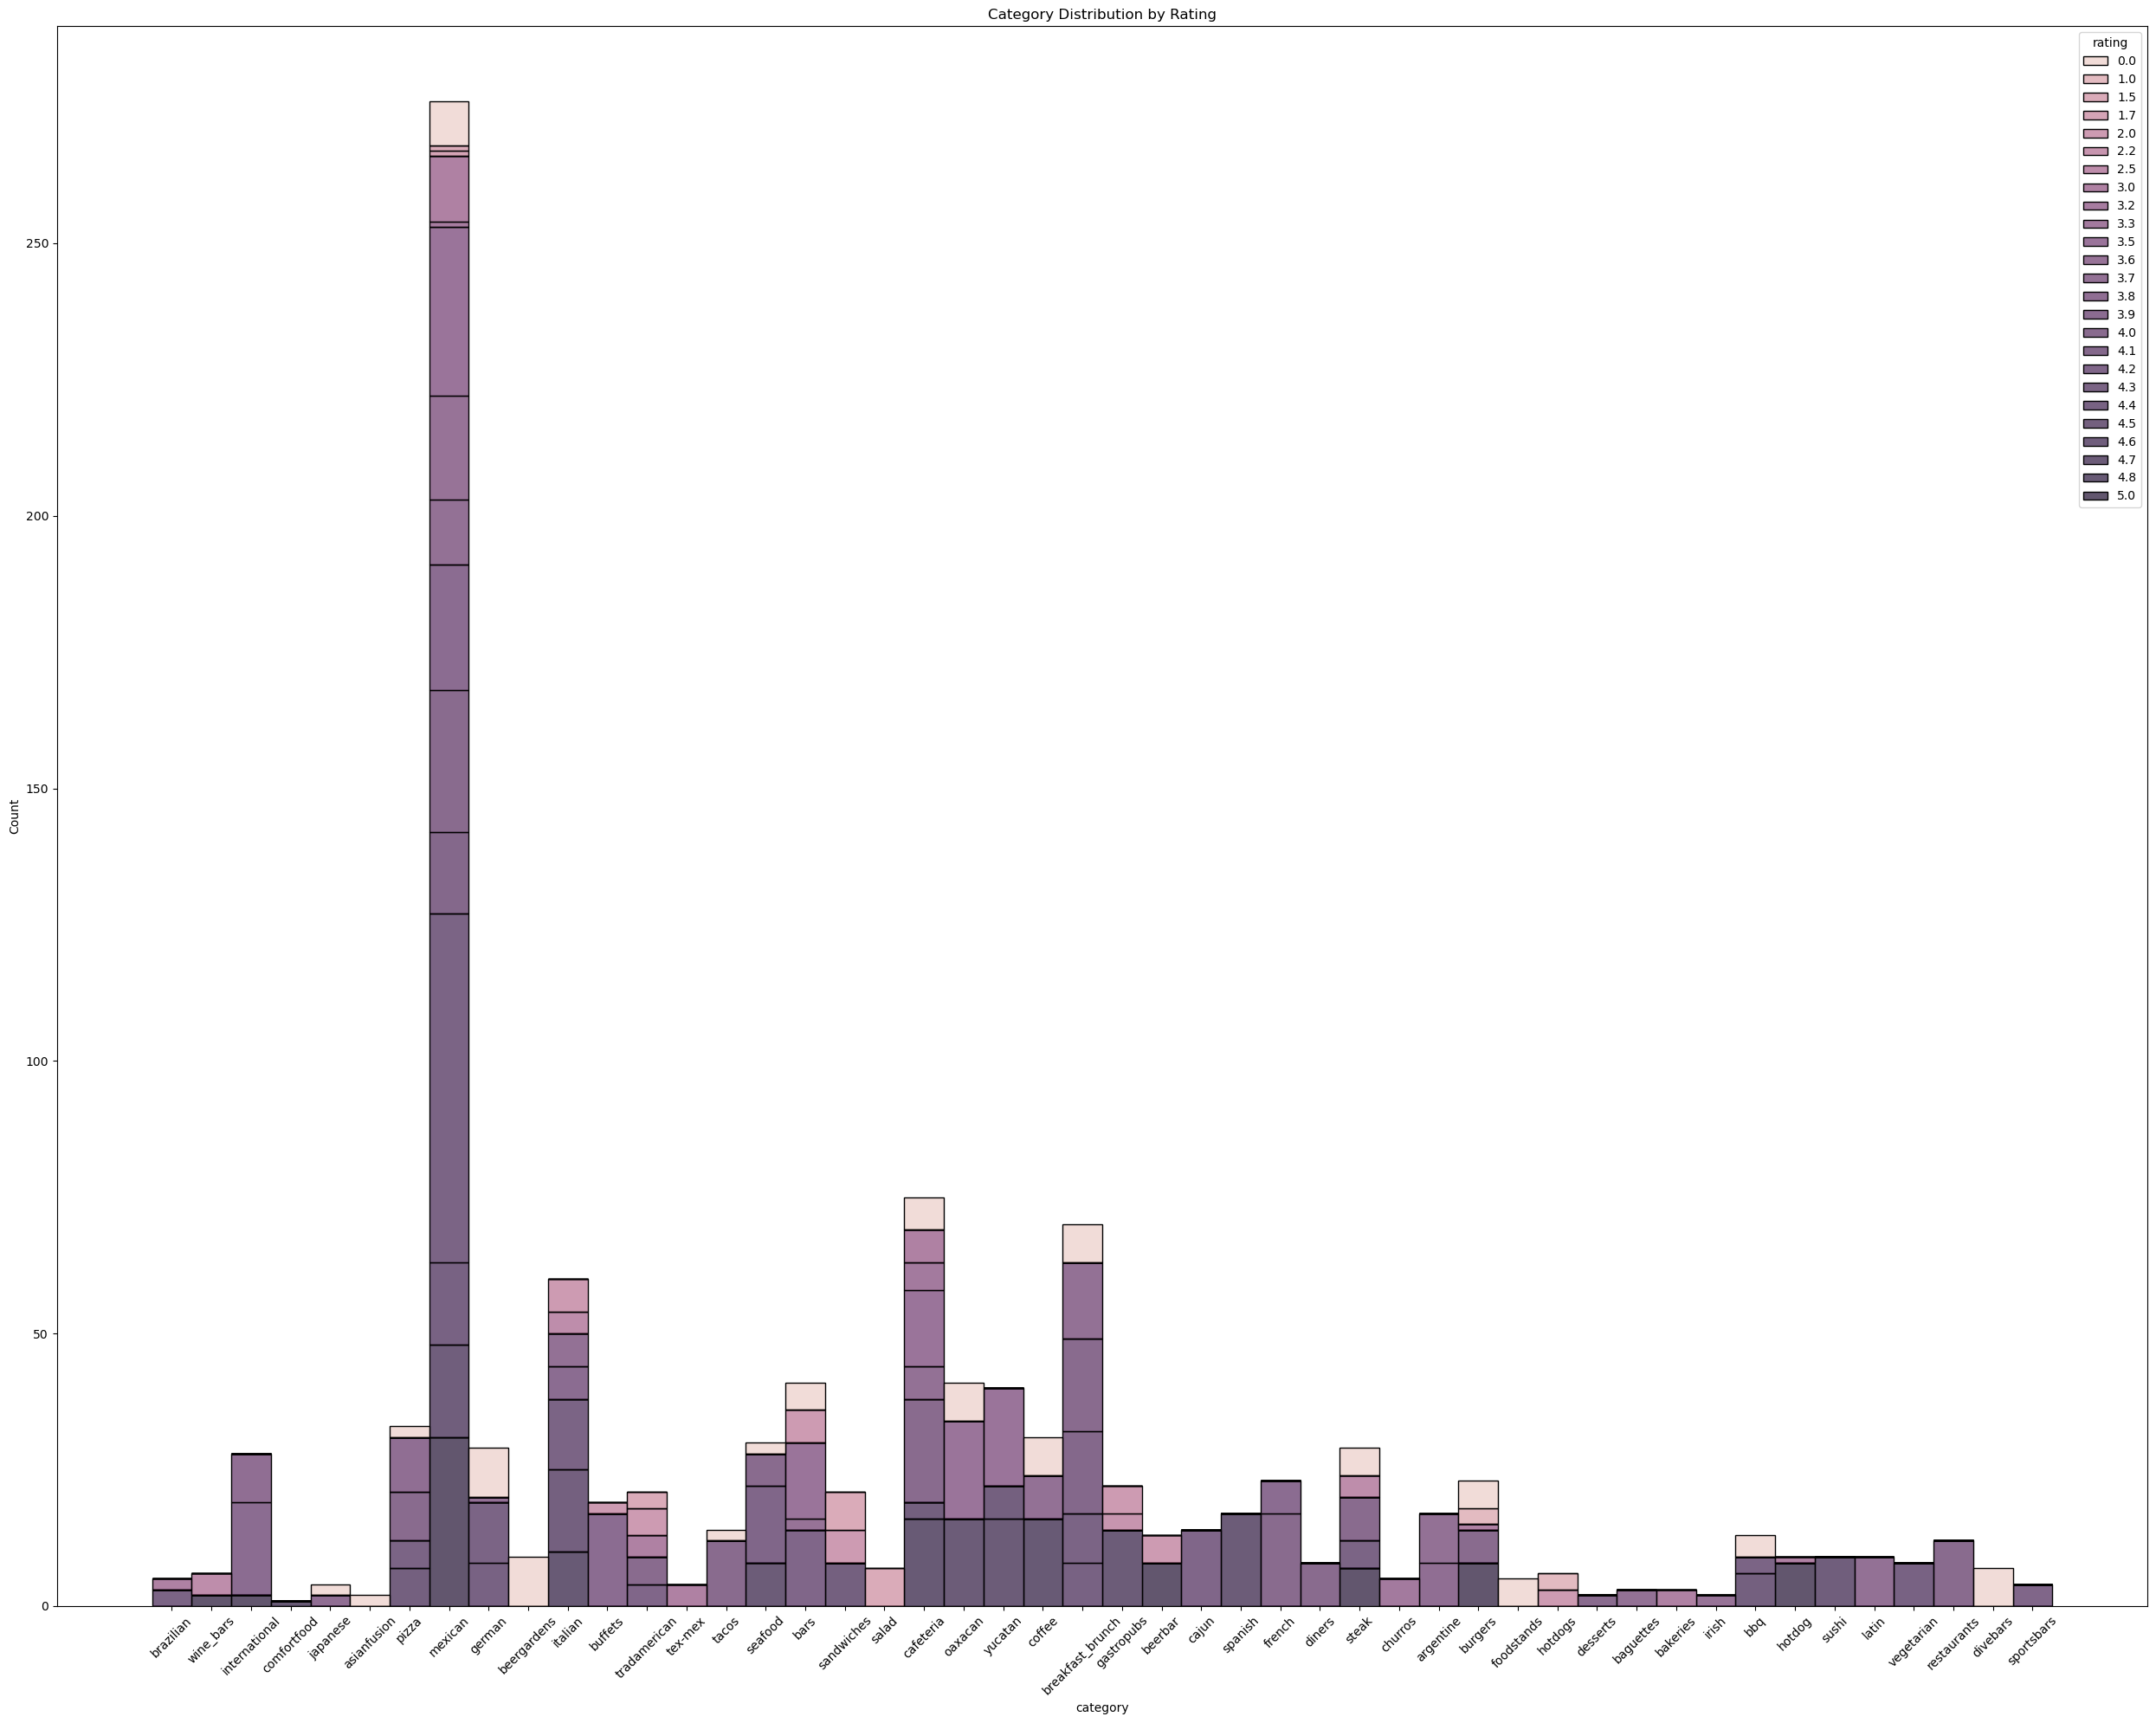

In [410]:
# Category Distribution by Rating
fig, axes = plt.subplots(figsize=(25, 20))

sns.histplot(data=joined_df_split, x='category', hue='rating', multiple='stack', ax=axes)
axes.set_title('Category Distribution by Rating')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Category Distribution by Rating.png')
plt.show()


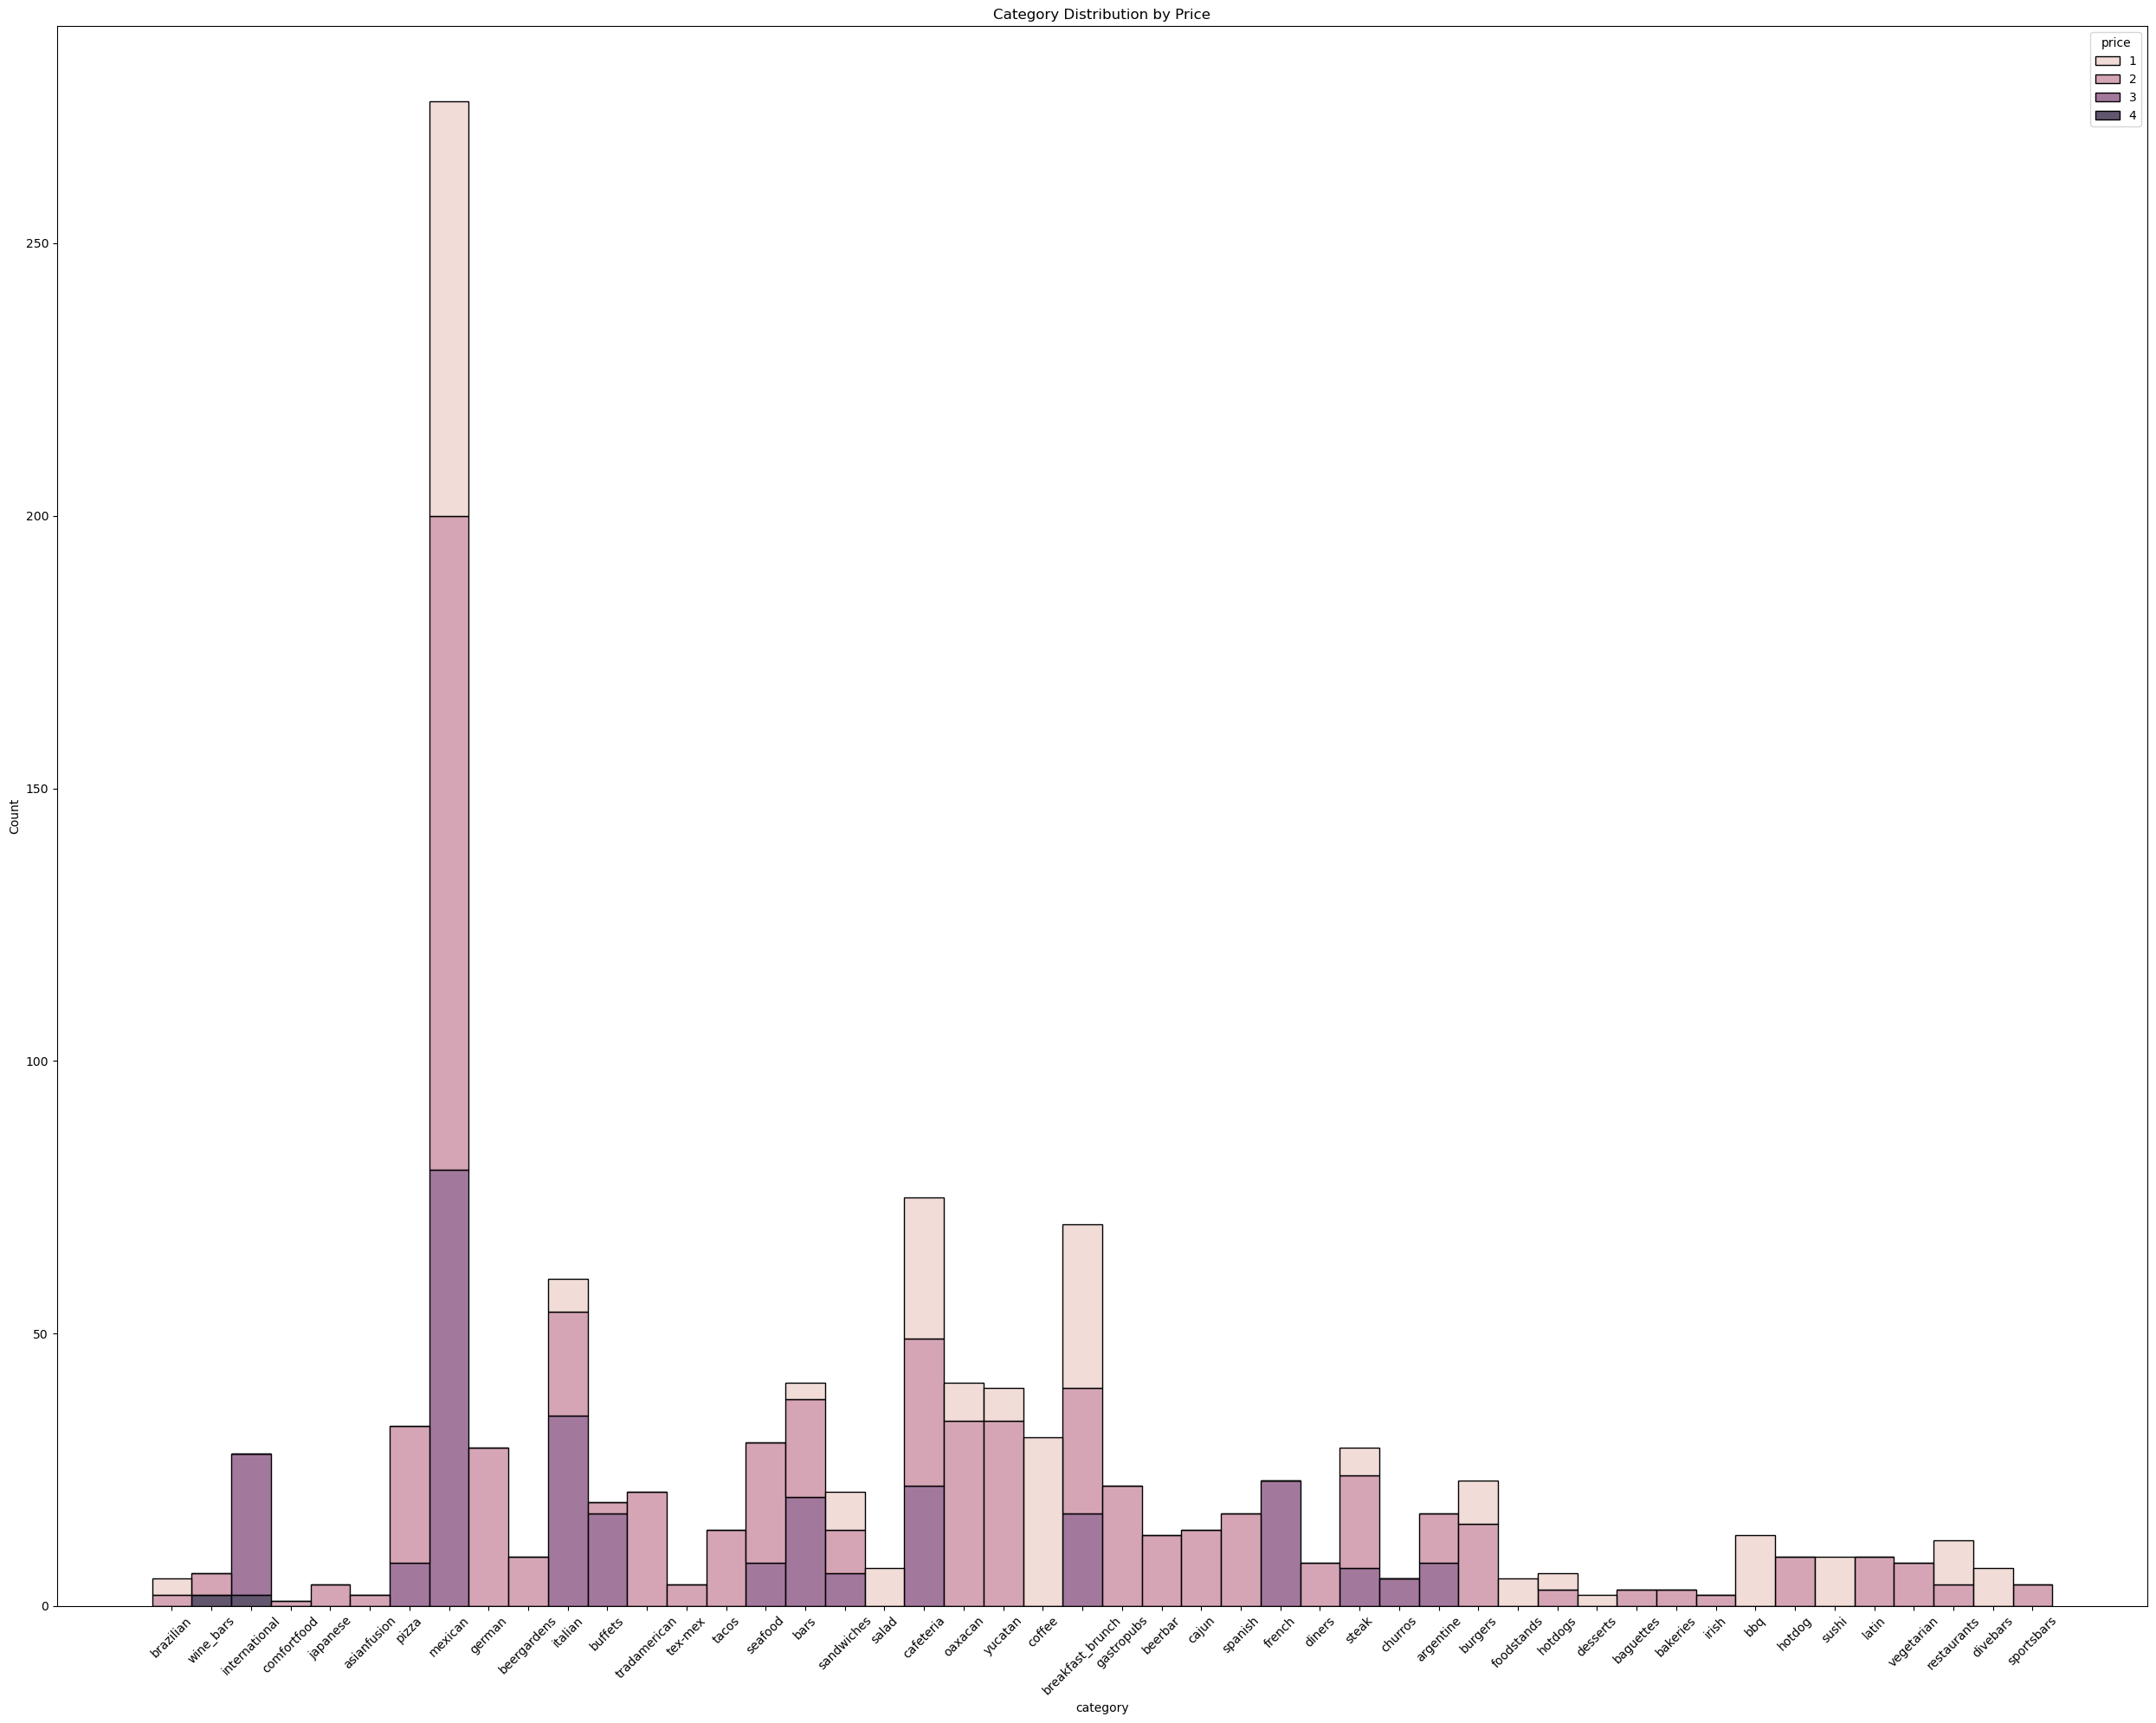

In [411]:
# Category Distribution by Price
fig, axes = plt.subplots(figsize=(25, 20))

sns.histplot(data=joined_df_split, x='category', hue='price', multiple='stack', ax=axes)
axes.set_title('Category Distribution by Price')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Category Distribution by Price.png')
plt.show()


*We can observe that for both the price and the rating, the category 'Mexican' has the most counts, meaning that most restaurants have this type of food. Being the 'Brazilian', 'Comfort Food', 'Asian Fusion', 'Irish' and 'desserts' the lowest counts. We can also observe the ratings and price ranges within each category, being the 'Mexican', 'Breakfast Brunch', 'Italian', 'Bars', 'Cafeteria', and 'Steak', categories with a wide range of prices (from cheap to moderately high).* 

*Only the 'Wine Bars' and 'International' categories are within the most expensive price range. On the other hand, the categories 'Foodstands', 'Salad', 'Coffee', 'Desserts', 'BBQ', and 'Dive Bars' only have one price range and it is the cheapest range.* 

*In order to clarify the categories with the highest count of high ratings or the count of most expensive/cheaper options, we can do a value_count for the 'Category' column:* 

In [412]:
categories_high_rating = pd.DataFrame(joined_df_split.groupby(by='rating')['category'].value_counts().tail(10))
categories_high_rating

count
rating category            
4.8    coffee            16
       italian           10
       comfortfood        1
5.0    mexican           31
       beerbar            8
       burgers            8
       hotdog             8
       steak              7
       international      2
       wine_bars          2

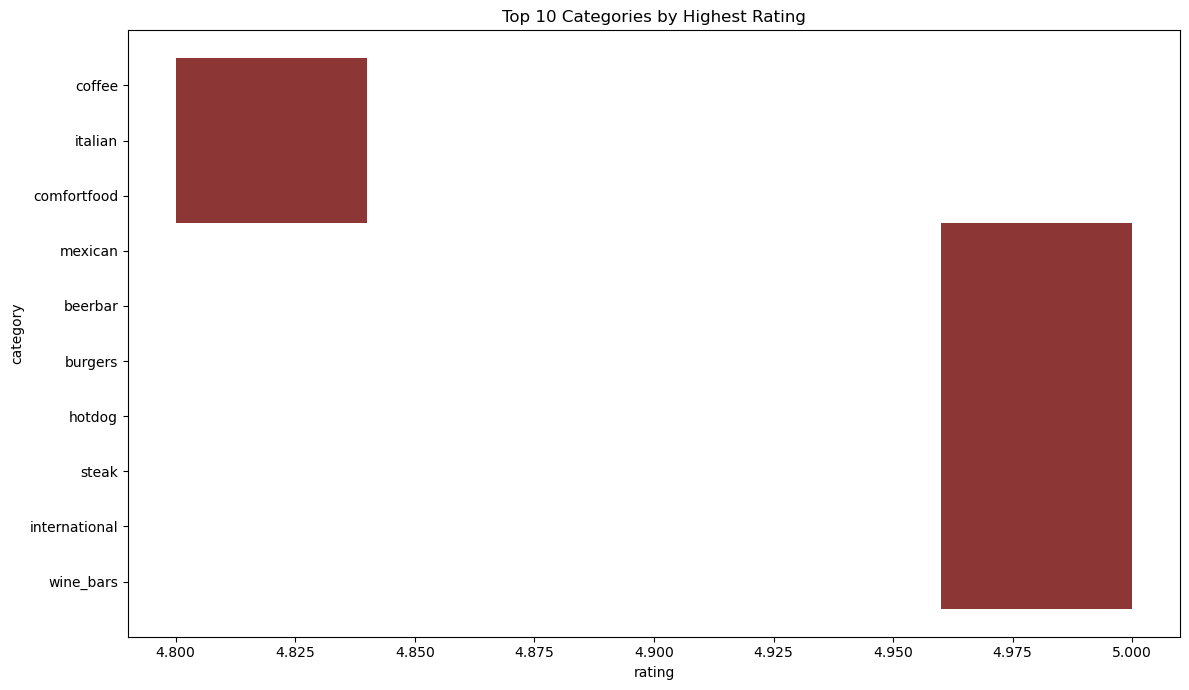

In [413]:
fig, axes = plt.subplots(figsize=(12, 7))

sns.histplot(data=categories_high_rating, x='rating', y='category', ax=axes, color='red')
axes.set_title('Top 10 Categories by Highest Rating')

plt.tight_layout()
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Top 10 Categories by Highest Rating.png')
plt.show()


In [414]:
categories_high_price = pd.DataFrame(joined_df_split.groupby(by='price')['category'].value_counts().tail(10))
categories_high_price

count
price category               
3     breakfast_brunch     17
      buffets              17
      argentine             8
      pizza                 8
      seafood               8
      steak                 7
      sandwiches            6
      churros               5
4     international         2
      wine_bars             2

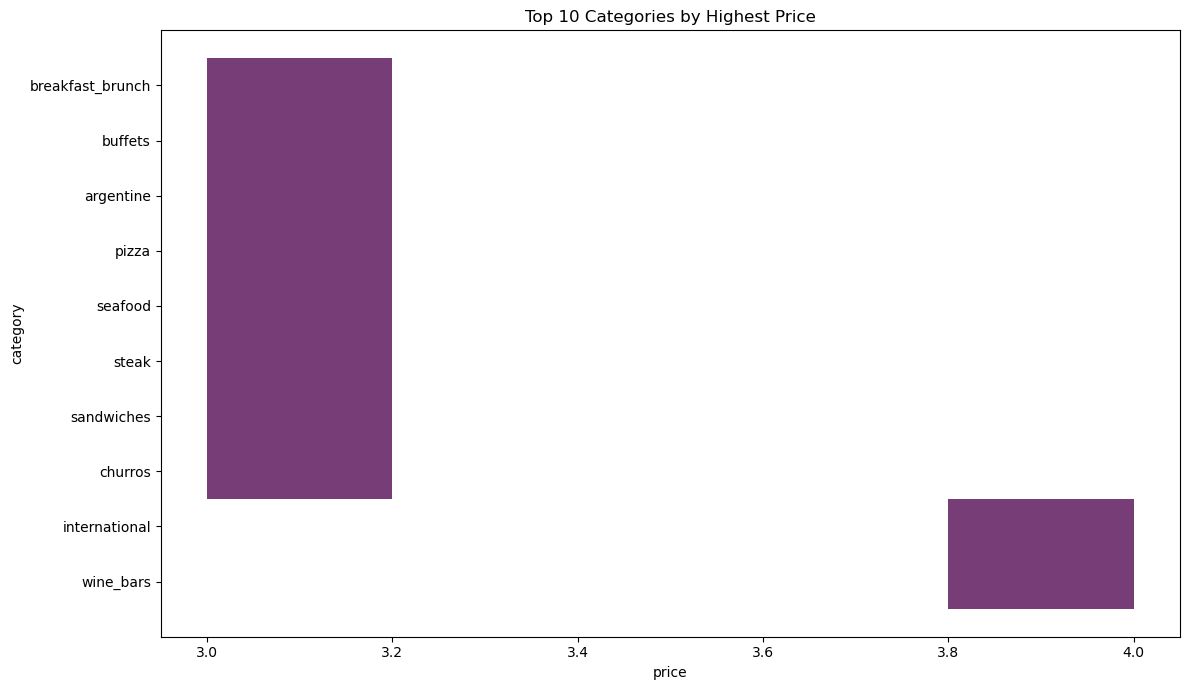

In [415]:
fig, axes = plt.subplots(figsize=(12, 7))

sns.histplot(data=categories_high_price, x='price', y='category', ax=axes, color='purple')
axes.set_title('Top 10 Categories by Highest Price')

plt.tight_layout()
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Top 10 Categories by Highest Price.png')
plt.show()


*In the following Heat Map plot, the correlation between variables is explored, whether there is a positive or negative correlation, it is important to know if there is any type of correlation.*

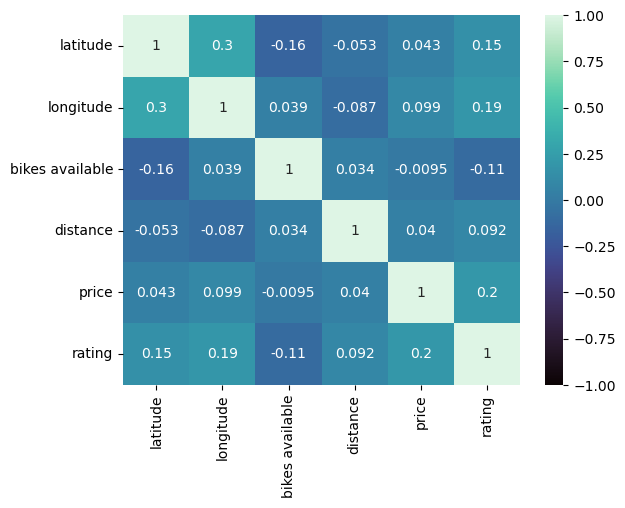

In [416]:
# Select only columns with numerical values
numerical_columns = joined_df_split.select_dtypes(include=['number'])

# Calculate correlation
sns.heatmap(numerical_columns.corr(), vmin=-1, vmax=1, cmap='mako', annot=True)  #mako, xflare, xcrest, magma
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Heat Map Numerical.png')
plt.show()

*In the Heat Map above, we can see that there doesn't seem to be any type of correlation between any of the numerical values.*

*In the Bar Chart below, we can observe the number of restaurants in each Category, and we can observe that the category 'Mexican' has the most restaurants. Which aligns with the previous results we concluded from the previouss plots.*

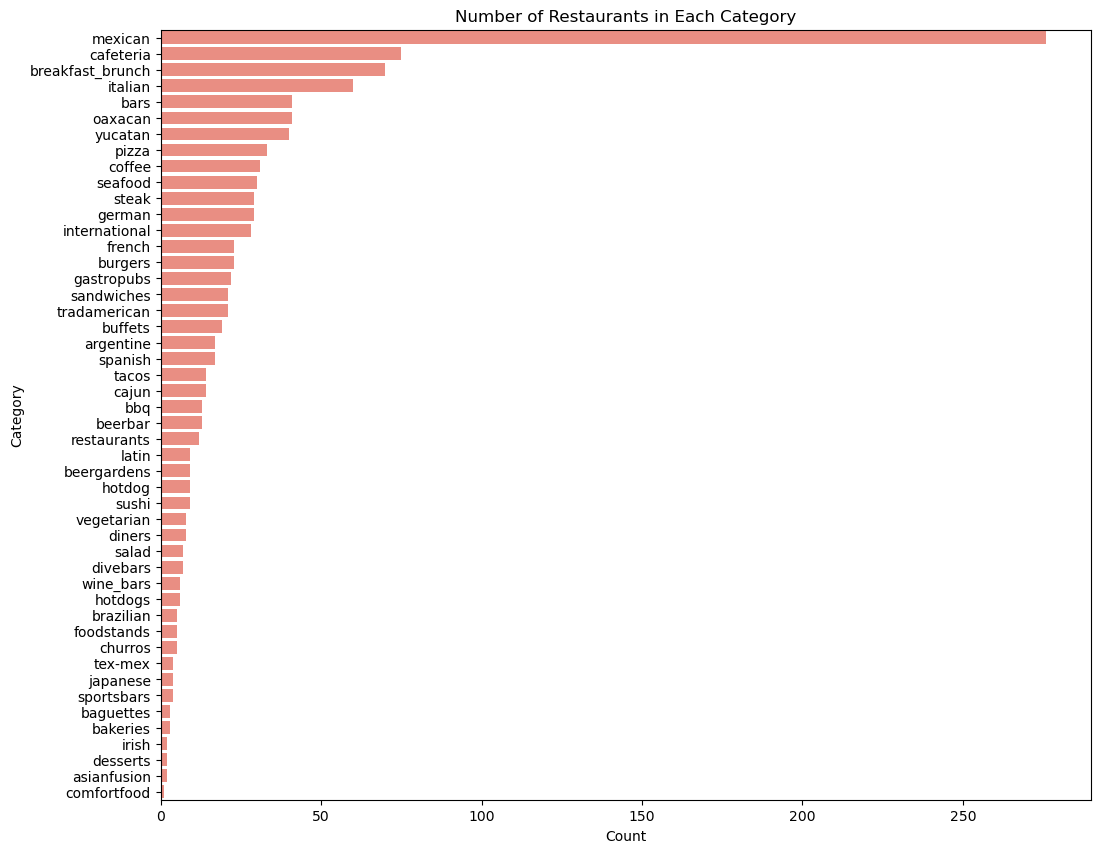

In [417]:
# Bar Chart
plt.figure(figsize=(12, 10))
sns.countplot(data=joined_df_split, y='category', order=joined_df_split['category'].value_counts().index, color='salmon')
plt.title('Number of Restaurants in Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.savefig('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/images/Bar Chart Restaurantss in Each Category.png')
plt.show()

# Database

## 1. Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [375]:
import sqlite3
import os

print(os.getcwd())

conn = sqlite3.connect('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/data/my_project_database.db')

/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/notebooks


In [376]:
c = conn.cursor()

In [377]:
station_df.to_sql('stations', conn, if_exists='replace', index=False)

42

*For purposes of this exercise, the following data frame `joined_df_split` will be used, but the 'categories' column, as well as the 'bikes available' column will be dropped. I could not use the original data frame that I inteded to, `restaurant_info_yelp_df`, because the column 'categories' is not supported because it has a list of dictionaries. I do not want to drop the column as it is an important part of the data, so I am using the joined data frame that was splitted already and dropping the information that will be joined after making the tables.*

In [378]:
restaurant_info_yelp_df.to_sql('yelp_restaurants', conn, if_exists='replace', index=False)  #Cannot use this data frame

InterfaceError: Error binding parameter 4 - probably unsupported type.

In [379]:
yelp_restaurants_df = joined_df_split.drop(columns=['categories', 'bikes available'])
yelp_restaurants_df.head()

,latitude,longitude,distance,name,price,rating,category
0,20.58065,-100.40985,270.080982,Fogon do Brasil,2,3.0,brazilian
1,20.58065,-100.40985,919.137726,Josecho,4,5.0,wine_bars
1,20.58065,-100.40985,919.137726,Josecho,4,5.0,international
2,20.58065,-100.40985,1001.499627,Karnes en Su Jugo,2,4.8,comfortfood
3,20.58065,-100.40985,989.584691,Ichiban,2,3.8,japanese


In [380]:
yelp_restaurants_df.to_sql('yelp_restaurants', conn, if_exists='replace', index=False)

1130

In [381]:
#Selecting all columns from stations table
def execute_read_query(conn, query):
    c = conn.cursor()
    result = None
    try:
        c.execute(query)
        result = c.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")


select_users = "SELECT * FROM stations"
users = execute_read_query(conn, select_users)

for user in users:
    print(user)

(20.58065, -100.40985, 12)
(20.584879, -100.4023, 5)
(20.58666, -100.3962, 2)
(20.58994, -100.38656, 3)
(20.59122, -100.38177, 5)
(20.578871, -100.40118, 3)
(20.5924, -100.389, 5)
(20.582693, -100.39681, 6)
(20.585168, -100.39163, 4)
(20.586198, -100.38682, 5)
(20.58669, -100.38214, 2)
(20.58615, -100.37931, 5)
(20.587384, -100.37546, 4)
(20.587495, -100.37174, 6)
(20.59155, -100.39127, 2)
(20.58334, -100.39102, 4)
(20.58673, -100.38761, 6)
(20.59238, -100.39527, 6)
(20.585969, -100.40729, 0)
(20.59875, -100.39251, 0)
(20.589438, -100.40089, 0)
(20.59644, -100.38074, 5)
(20.5957, -100.406, 0)
(20.59354, -100.40795, 0)
(20.5931, -100.40572, 3)
(20.60144, -100.38394, 4)
(20.60071, -100.38058, 10)
(20.600106, -100.377, 2)
(20.604942, -100.3831, 0)
(20.59813, -100.39524, 0)
(20.612746, -100.39711, 0)
(20.591378, -100.4071, 3)
(20.61301, -100.39237, 7)
(20.61402, -100.38666, 5)
(20.6089, -100.38599, 5)
(20.60694, -100.38636, 5)
(20.60273, -100.39255, 0)
(20.58848, -100.38971, 1)
(20.59734, 

In [382]:
#Selecting all columns from yelp_restaurants table
select_users = "SELECT * from yelp_restaurants"
users = execute_read_query(conn, select_users)

for user in users:
    print(user)

(20.58065, -100.40985, 270.08098203444536, 'Fogon do Brasil', 2, 3.0, 'brazilian')
(20.58065, -100.40985, 919.1377255821862, 'Josecho', 4, 5.0, 'wine_bars')
(20.58065, -100.40985, 919.1377255821862, 'Josecho', 4, 5.0, 'international')
(20.58065, -100.40985, 1001.4996274292365, 'Karnes en Su Jugo', 2, 4.8, 'comfortfood')
(20.58065, -100.40985, 989.5846912507262, 'Ichiban', 2, 3.8, 'japanese')
(20.58065, -100.40985, 641.4122809237988, 'Pawa', 2, 0.0, 'japanese')
(20.58065, -100.40985, 641.4122809237988, 'Pawa', 2, 0.0, 'asianfusion')
(20.58065, -100.40985, 985.0333864317723, 'Pizzeria La Tómbola', 2, 3.8, 'pizza')
(20.58065, -100.40985, 1289.7525451297515, 'Las Delicias', 2, 5.0, 'mexican')
(20.58065, -100.40985, 1138.5719433369422, 'El Fogón del Pastor', 1, 3.2, 'mexican')
(20.58065, -100.40985, 793.9256855261241, 'Biergarten Eder', 2, 0.0, 'german')
(20.58065, -100.40985, 793.9256855261241, 'Biergarten Eder', 2, 0.0, 'beergardens')
(20.58065, -100.40985, 1015.2471582199248, 'Cafe Amade

*The column 'price_category', with the $ symbols, will be deleted from the table because it was an added column to plot the values, but it is redundant as we also have it as numerical values in the column 'price'.*

In [ ]:
delete_column_query = "ALTER TABLE yelp_restaurants DROP COLUMN price_category"
c.execute(delete_column_query)
conn.commit()


In [ ]:
conn.close()

In [384]:
#Selecting all columns from yelp_restaurants table after dropping the column 'price_category'
select_users = "SELECT * from yelp_restaurants"
users = execute_read_query(conn, select_users)

for user in users:
    print(user)

(20.58065, -100.40985, 270.08098203444536, 'Fogon do Brasil', 2, 3.0, 'brazilian')
(20.58065, -100.40985, 919.1377255821862, 'Josecho', 4, 5.0, 'wine_bars')
(20.58065, -100.40985, 919.1377255821862, 'Josecho', 4, 5.0, 'international')
(20.58065, -100.40985, 1001.4996274292365, 'Karnes en Su Jugo', 2, 4.8, 'comfortfood')
(20.58065, -100.40985, 989.5846912507262, 'Ichiban', 2, 3.8, 'japanese')
(20.58065, -100.40985, 641.4122809237988, 'Pawa', 2, 0.0, 'japanese')
(20.58065, -100.40985, 641.4122809237988, 'Pawa', 2, 0.0, 'asianfusion')
(20.58065, -100.40985, 985.0333864317723, 'Pizzeria La Tómbola', 2, 3.8, 'pizza')
(20.58065, -100.40985, 1289.7525451297515, 'Las Delicias', 2, 5.0, 'mexican')
(20.58065, -100.40985, 1138.5719433369422, 'El Fogón del Pastor', 1, 3.2, 'mexican')
(20.58065, -100.40985, 793.9256855261241, 'Biergarten Eder', 2, 0.0, 'german')
(20.58065, -100.40985, 793.9256855261241, 'Biergarten Eder', 2, 0.0, 'beergardens')
(20.58065, -100.40985, 1015.2471582199248, 'Cafe Amade

*The column was dropped succesfully.*

## 2. Look at the data before and after the join to validate your data.

*Now, the two tables, stations and yelp_restaurants, will be joined using the columns 'latitude' and 'longitude'.*

In [385]:
select_users = "SELECT yr.latitude, yr.longitude, distance, name, price, rating, category, [bikes available] FROM yelp_restaurants AS yr JOIN stations AS s ON yr.longitude = s.longitude AND yr.latitude = s.latitude"
users = execute_read_query(conn, select_users)

for user in users:
    print(user)

(20.58065, -100.40985, 270.08098203444536, 'Fogon do Brasil', 2, 3.0, 'brazilian', 12)
(20.58065, -100.40985, 919.1377255821862, 'Josecho', 4, 5.0, 'wine_bars', 12)
(20.58065, -100.40985, 919.1377255821862, 'Josecho', 4, 5.0, 'international', 12)
(20.58065, -100.40985, 1001.4996274292365, 'Karnes en Su Jugo', 2, 4.8, 'comfortfood', 12)
(20.58065, -100.40985, 989.5846912507262, 'Ichiban', 2, 3.8, 'japanese', 12)
(20.58065, -100.40985, 641.4122809237988, 'Pawa', 2, 0.0, 'japanese', 12)
(20.58065, -100.40985, 641.4122809237988, 'Pawa', 2, 0.0, 'asianfusion', 12)
(20.58065, -100.40985, 985.0333864317723, 'Pizzeria La Tómbola', 2, 3.8, 'pizza', 12)
(20.58065, -100.40985, 1289.7525451297515, 'Las Delicias', 2, 5.0, 'mexican', 12)
(20.58065, -100.40985, 1138.5719433369422, 'El Fogón del Pastor', 1, 3.2, 'mexican', 12)
(20.58065, -100.40985, 793.9256855261241, 'Biergarten Eder', 2, 0.0, 'german', 12)
(20.58065, -100.40985, 793.9256855261241, 'Biergarten Eder', 2, 0.0, 'beergardens', 12)
(20.58

*Both tables have now the longitude, latitude, distance, name, rating, price, category and number of bikes available.* 

*The following will do a count of the rows to see if the table changed the number of rows.*


In [386]:
select_users = "SELECT count(*) FROM yelp_restaurants AS yr JOIN stations AS s ON yr.longitude = s.longitude AND yr.latitude = s.latitude"
users = execute_read_query(conn, select_users)

for user in users:
    print(user)

(1130,)


In [387]:
#Checking for any NULL VALUES, but none are found.
select_users = "SELECT * FROM yelp_restaurants AS yr JOIN stations AS s ON yr.longitude = s.longitude AND yr.latitude = s.latitude WHERE yr.latitude IS NULL OR yr.longitude IS NULL OR distance IS NULL OR name IS NULL OR price IS NULL OR rating IS NULL OR category IS NULL OR [bikes available] IS NULL"
users = execute_read_query(conn, select_users)

for user in users:
    print(user)

In [388]:
# Count restaurants per bike station location and return only the top 3 stations.
select_users = "SELECT yr.latitude, yr.longitude, COUNT(name) AS rest_count FROM yelp_restaurants AS yr JOIN stations AS s ON yr.longitude = s.longitude AND yr.latitude = s.latitude GROUP BY yr.latitude, yr.longitude ORDER BY rest_count DESC LIMIT 3"
users = execute_read_query(conn, select_users)

for user in users:
    print(user)

(20.585168, -100.39163, 35)
(20.586198, -100.38682, 35)
(20.58673, -100.38761, 35)


*In the above SQL query reponse, the top 3 bike stations with the most restaurants surrounding them are presented. It's likely that it is the same restaurants as the locations as really close to each other.*

### *The data frame `joined_df_split` will be needed for the regression model, so it will be save as a csv file to access it from a different notebook.*

In [389]:
joined_df_split.to_csv('/Users/elizaclapasmac/Desktop/Repositories/Statistical-Modelling-Project - Week 12/Statistical-Modelling-Project/notebooks/joined_dt_split.csv', index=False)